To complete this challenge, determine the five most common journals and the total articles for each. Next, calculate the mean, median, and standard deviation of the open-access cost per article for each journal.

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Thinkful_data\WELLCOME_APCspend2013_forThinkful.csv', encoding='unicode_escape')
df.columns = ['PMID/PMCID', 'Publisher', 'Journal title', 'Article title','Cost']
df.loc[0:10,:]

,PMID/PMCID,Publisher,Journal title,Article title,Cost
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88
5,PMC3579457,ACS,Journal of Medicinal Chemistry,Comparative Structural and Functional Studies ...,£2392.20
6,PMC3709265,ACS,Journal of Proteome Research,Mapping Proteolytic Processing in the Secretom...,£2367.95
7,23057412 PMC3495574,ACS,Mol Pharm,Quantitative silencing of EGFP reporter gene b...,£649.33
8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,£1294.59
9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,Chemical proteomic analysis reveals the drugab...,£1294.78


Tasks to clean the data:
    1. Standardize journal titles (i.e. J Med Chem and Journal of Medicinal Chemistry should be the same)
    2. Convert prices to numbers

Steps to standardize journal titles- strip white space, 
        
        1. strip white space
        2. standardize casing
        2. remove non-alphanumeric chars (i.e. P.N.A.S. = PNAS)
        3. manually search for cases in remaining top 10 journals

In [3]:
#Strip reduced total Journal titles from 984 to 951, removing 33
#Lower casing reduced total from 951 to 894, removing 57 redundancies
#Removing nonalphanumeric chars reduced total from 894 to 886, removing 8 redundancies


df.loc[:,'Journal title'] = df.loc[:,'Journal title'].str.strip()
print(len(df.groupby('Journal title')['Journal title'].count()))

df.loc[:,'Journal title'] = df.loc[:,'Journal title'].str.lower()
print(len(df.groupby('Journal title')['Journal title'].count()))

for i in range(len(df.loc[:,'Journal title'])):
    df.loc[i,'Journal title'] = re.sub('[^a-zA-Z0-9]', '',str(df.loc[i,'Journal title']))
    
print(len(df.groupby('Journal title')['Journal title'].count()))

951
894
886


In [4]:
#Now manually search for redundant entries in top 10 journals
#To find potentially missing entries, I sorted the csv doc in excel to manually scrub before coding into Python

sorted = df.groupby('Journal title')['Journal title'].count().sort_values(ascending=False)
sorted[0:10]

Journal title
plosone                                      200
journalofbiologicalchemistry                  53
neuroimage                                    29
nucleicacidsresearch                          26
plospathogens                                 24
plosgenetics                                  24
proceedingsofthenationalacademyofsciences     22
plosneglectedtropicaldiseases                 20
humanmoleculargenetics                        19
naturecommunications                          19
Name: Journal title, dtype: int64

In [5]:
#manual search for uncaptured Plos One entries (added 7 entries)
#Plos 1 would not have been captured above, added 7 entries

df.loc[df.loc[:,'Journal title'] == 'plos1','Journal title'] = 'plosone'
len(df.loc[df.loc[:,'Journal title'] == 'plosone','Journal title'])

207

In [6]:
#manual search for uncaptured Journal of Biological Chemistry (added 12 entries)

df.loc[df.loc[:,'Journal title'] == 'biologicalchemistry','Journal title'] = 'journalofbiologicalchemistry'
df.loc[df.loc[:,'Journal title'] == 'biologicialchemistry','Journal title'] = 'journalofbiologicalchemistry'
df.loc[df.loc[:,'Journal title'] == 'jbiolchem','Journal title'] = 'journalofbiologicalchemistry'
df.loc[df.loc[:,'Journal title'] == 'jnlbiologicalchemistry','Journal title'] = 'journalofbiologicalchemistry'
df.loc[df.loc[:,'Journal title'] == 'journalbiologicalchemistry','Journal title'] = 'journalofbiologicalchemistry'
df.loc[df.loc[:,'Journal title'] == 'journalofbiolchem','Journal title'] = 'journalofbiologicalchemistry'
len(df.loc[df.loc[:,'Journal title'] == 'journalofbiologicalchemistry','Journal title'])

65

In [7]:
#no missing entries found in manual search for Neuroimage

In [8]:
#no missing entries found in manual search for Nucleic Acids Research

In [9]:
#no missing entries found in manual search for Plos Pathogens

In [10]:
#no missing entries found in manual search for Plos Genetics

In [11]:
#manual search for uncaptured Proceedings of the National Academy of Sciences (added 14 entries)

df.loc[df.loc[:,'Journal title'] == 'pnas','Journal title'] = 'proceedingsofthenationalacademyofsciences'
df.loc[df.loc[:,'Journal title'] == 'pnasproceedingsofthenationalacademyofsciencesoftheunitedstatesofamerica','Journal title'] = 'proceedingsofthenationalacademyofsciences'
df.loc[df.loc[:,'Journal title'] == 'pnasusa','Journal title'] = 'proceedingsofthenationalacademyofsciences'
df.loc[df.loc[:,'Journal title'] == 'proceddingsofthenationalacademyofsciencesofusa', 'Journal title'] = 'proceedingsofthenationalacademyofsciences'
df.loc[df.loc[:,'Journal title'] == 'proceedingsofthenationalacademyofsciencesoftheunitedstatesofamerica','Journal title'] = 'proceedingsofthenationalacademyofsciences'
df.loc[df.loc[:,'Journal title'] == 'proceedingsofthenationalacademyofsciencespnas', 'Journal title'] = 'proceedingsofthenationalacademyofsciences'
df.loc[df.loc[:,'Journal title'] == 'proceedingsofthenationalacademyofsciencesoftheusa', 'Journal title'] = 'proceedingsofthenationalacademyofsciences'
len(df.loc[df.loc[:,'Journal title'] == 'proceedingsofthenationalacademyofsciences', 'Journal title'])

36

In [12]:
#manual search for uncaptured Plos Negltected Tropical Diseases (Added 2 entries)

df.loc[df.loc[:,'Journal title'] == 'plosntd', 'Journal title'] = 'plosneglectedtropicaldiseases'
df.loc[df.loc[:,'Journal title'] == 'plosnegectedtropicaldiseases', 'Journal title'] = 'plosneglectedtropicaldiseases'
len(df.loc[df.loc[:,'Journal title']=='plosneglectedtropicaldiseases', 'Journal title'])

22

In [13]:
#manual search for uncaptured Human Molecular Genetics, 2 entries were listed as online journals
#I decided to join these to the main journal as the prices were similar

df.loc[df.loc[:,'Journal title'] == 'humanmolgeneticsonline', 'Journal title'] = 'humanmoleculargenetics'
df.loc[df.loc[:,'Journal title'] == 'humanmoleculargeneticsonline', 'Journal title'] = 'humanmoleculargenetics'
len(df.loc[df.loc[:,'Journal title'] == 'humanmoleculargenetics', 'Journal title'])

21

In [14]:
#no missing entries found in manual search for Nature Communications entries

# Top 5 most common journals and the number of entries for each

In [15]:
sorted = df.groupby('Journal title')['Journal title'].count().sort_values(ascending=False)
sorted[0:5]

Journal title
plosone                                      207
journalofbiologicalchemistry                  65
proceedingsofthenationalacademyofsciences     36
neuroimage                                    29
nucleicacidsresearch                          26
Name: Journal title, dtype: int64

Steps to clean cost data

    1. Convert to float for numeric calculations
    2. Remove anamolous values
    3. Adjust outliers if needed

In [16]:
#Convert cost data to float

df.loc[:, 'Cost'] = df.loc[:, 'Cost'].apply(lambda x: ''.join(list(filter(str.isdigit, str(x)))))
df.loc[:, 'Cost'] = df.loc[:, 'Cost'].apply(lambda x: float(x)*.01)

In [17]:
#Some cost data has been entered with an abnormally high value, this appears to be an anomalous value
#Removing these should be valid as the abnormal entry appears across numerous journals seemingly at random

df.loc[df.loc[:,'Cost'] == 999999.00,:] = np.nan
df = df.dropna(subset=['Journal title', 'Cost'])

#Create new indices due to nan removal
df.index = range(len(df.index))

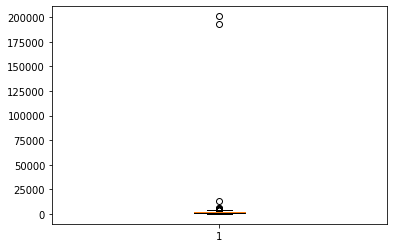

In [18]:
plt.boxplot(df.loc[:,'Cost'].sort_values())
plt.show()

The outlier values seem unrealistically high, to preserve the data I will need to compare each outlier to the costs for that journal and adjust if it is an outlier for that specific journal.

In [19]:
#Create threshold function which finds outlier threshold given dataset > 4, else it returns 120% mean
def threshold(data):
    if len(data) > 4:
        t = data.quantile(0.75) + 1.5*(data.quantile(0.75)-data.quantile(0.25))
        return t
    else:
        return data.mean()*1.2

#Find outlier threshold using Tukey's 1.5*IQR + Q3 formula for entire cost dataset
total_threshold = threshold(df.loc[:,'Cost'])
print(total_threshold)

#Save the indices for entries which have outliers (note that 48 were identified)
outlier_indices = df.loc[df.loc[:,'Cost']>total_threshold, :].index
len(outlier_indices)

3866.9349999999995


48

In [20]:
#Compare outliers to their specific journal costs to determine if they need to be adjusted, 7 were flagged
flagged_outliers = []

for outlier_index in outlier_indices:
    if df.loc[outlier_index, 'Cost'] > threshold(df.loc[df.loc[:,'Journal title'] == df.loc[outlier_index,'Journal title'],'Cost']):
            flagged_outliers.append(outlier_index)
print(flagged_outliers)

[438, 483, 484, 545, 639, 1441, 1940]


In [21]:
#Compare the costs of the flagged outliers to the means of their journals

print(df.loc[flagged_outliers, 'Cost'])

for i in range(len(flagged_outliers)):
    print(df.loc[df.loc[:,'Journal title']==df.loc[flagged_outliers[i],'Journal title'], 'Cost'].mean())

438       3938.82
483       3948.42
484       4163.88
545       4800.00
639       4800.00
1441    192645.00
1940    201024.00
Name: Cost, dtype: float64
2684.5099999999998
3171.7675
3171.7675
2625.421428571429
2819.175
1898.3490452261308
15176.788


Indices 1441 and  1940 will be multiplied by .01 to fit back into their datasets, these are the only 2 values that seem unrealistically high and they appear to have been entered incorrectly

In [22]:
df.loc[1441, 'Cost'] = df.loc[1441, 'Cost']*.01
df.loc[1940, 'Cost'] = df.loc[1940, 'Cost']*.01

# Next, calculate the mean, median, and standard deviation of the open-access cost per article for each journal

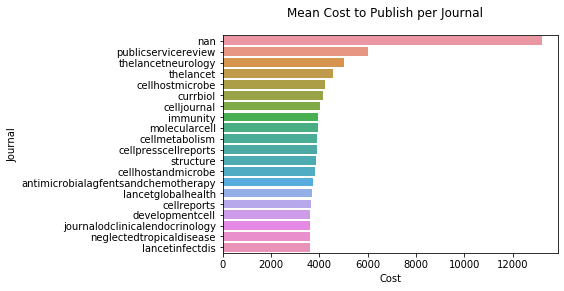

In [23]:
#mean
means = df.groupby('Journal title')['Cost'].mean()
means = means.sort_values(ascending=False)
means_df = pd.DataFrame(means[0:20])
means_df['Journal'] = means.index[0:20]
ax = sns.barplot(x='Cost',y='Journal', data=means_df)
plt.suptitle('Mean Cost to Publish per Journal')
plt.show()

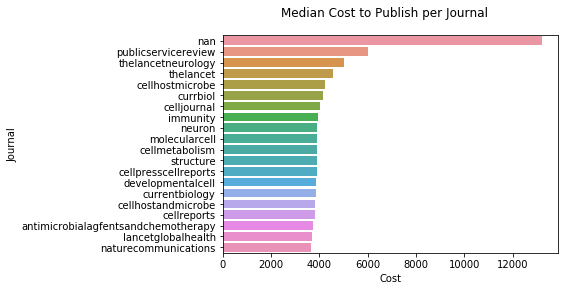

In [25]:
#median
medians = df.groupby('Journal title')['Cost'].median()
medians = medians.sort_values(ascending=False)
medians_df = pd.DataFrame(medians[0:20])
medians_df['Journal'] = medians.index[0:20]
ax = sns.barplot(x='Cost',y='Journal', data=medians_df)
plt.suptitle('Median Cost to Publish per Journal')
plt.show()

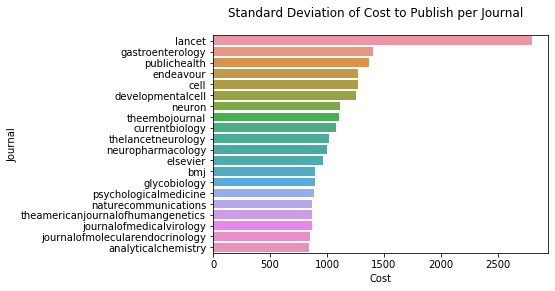

In [26]:
#Standard deviation
std = df.groupby('Journal title')['Cost'].std()
std = std.sort_values(ascending=False)
std_df = pd.DataFrame(std[0:20])
std_df['Journal'] = std.index[0:20]
ax = sns.barplot(x='Cost',y='Journal', data=std_df)
plt.suptitle('Standard Deviation of Cost to Publish per Journal')
plt.show()

# Bonus find the average cost per subject area
    
    1. Create list of subjects
    2. Create dataframe w/ subjects and average cost of journals in that subject

In [44]:
#Create search items to categorize into each subject

subjects = [{'subject': 'chemistry', 'search_items':['chem']},
            {'subject': 'biology', 'search_items':['bio']},
            {'subject': 'medicine', 'search_items':['med']},
            {'subject': 'immunology', 'search_items':['immun']},
            {'subject': 'neurology', 'search_items':['neuro','brain']},
            {'subject': 'psychology', 'search_items':['psych']},
            {'subject': 'virology', 'search_items':['viro', 'virus']},
            {'subject': 'cell science', 'search_items':['cell']},
            {'subject': 'genetics', 'search_items':['gene']},
            {'subject': 'cancer', 'search_items':['cancer', 'onco']}]

The following loop will iterate through each search item, search the journal titles for those items, then add them to a list where each index is a seperate subject, some journals will be categorized into multiple subjects

In [45]:
temp = []
subjects_list = list(range(len(subjects)))

for i in range(len(subjects)):
    for ii in range(len(df['Journal title'])):
        for iii in range(len(subjects[i]['search_items'])):
            if subjects[i]['search_items'][iii] in df.loc[ii, 'Journal title']:
                temp.append(df.loc[ii, 'Cost'])
    subjects_list[i] = temp
    temp = []        

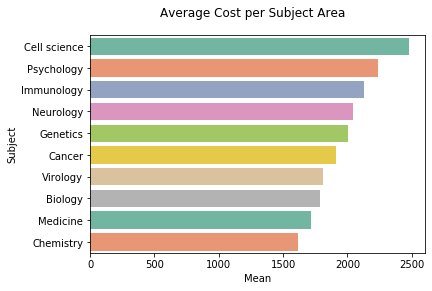

In [47]:
import statistics as stats
subjects_df = pd.DataFrame()

subject_means = []
for i in range(len(subjects_list)):
    subject_means.append(stats.mean(subjects_list[i]))

names = []
for subject in subjects:
    names.append(subject['subject'].capitalize())
    
subjects_df['Mean'] = subject_means
subjects_df['Subject'] = names
subjects_df = subjects_df.sort_values(by='Mean', ascending=False)

sns.barplot(y='Subject',x='Mean', data=subjects_df, palette='Set2')
plt.suptitle('Average Cost per Subject Area')
plt.show()